# Manejo de datos perdidos en series temporales

- En el desarrollo teórico de la mayoría de técnicas y modelos no se tienen en cuenta algunas cuestiones que surgen en su aplicación práctica, como es en concreto la existencia de datos faltantes, también denominados perdidos o incompletos.


- Muchas series temporales existentes contienen valores perdidos o no presentes en las observaciones que las componen (ya sean provocados por mediciones incorrectas, errores, etc). Estos valores perdidos crean numerosos problemas y hacen dificil el análisis de los datos, por lo tanto su presencia hace que sea necesaria una etapa de preprocesado de la serie. 
- La manera más simple de tratar con ellos es descartándolos, pero esto solo es posible cuándo son muy pocos los valores perdidos y no tienen influencia en el análisis posterior. Otra forma de lidiar con ellos es realizar el análisis únicamente con los datos disponibles. Pero uno de los métodos más conocidos para tratar con este problema es la imputación.




## **Imputación**

En estadística, la imputación es el proceso de reemplazar los valores perdidos con valores sustitutos. El objetivo de la imputación es rellenar los valores perdidos con estimaciones (realizadas con el método de aprendizaje más apropiado para cada caso) de estos teniendo en cuenta las relaciones posibles entre las observaciones. Luego existen diversos métodos de imputación diferenciados en la forma de estimar los datos faltantes, cuya elección preferible vendrá dada por la naturaleza de la serie:


### **Métodos de imputación simples**

- **Imputación mediante la media:** se reemplazan los valores perdidos por la media de los valores observados.
- **Imputación mediante regresión:** se estima una regresión de las observaciones existentes y se imputa cada valor perdido mediante la ecuación de regresión estimada.

- **Imputación mediante regresión estocástica:** similar al enterior pero se imputa añadiendo a la predicción un valor residual para reestablecer la pérdida de variabilidad.
- **Imputación mediante médias móviles:** se reemplazan las observaciones faltantes por los valores estimados mediante médias móviles.
- **Imputación por Last Observation Carried Forward (locf):** reemplaza el dato perdido por la observacion que le precede.
- **Imputación por interpolación:** se estiman los valores perdidos interpolando (uniendo de manera lineal, polinomial, etc.) el último valor válido antes del valor perdido y el primer valor válido después del valor perdido.



### Métodos de imputación basados en máxima verosimilitud

- **Imputación múltiple:** consiste en realizar varias imputaciones de las observaciones faltantes para luego analizar los conjuntos de datos completados y combinar los resultados obtenidos para obtener una estimacion final. El análisis de imputación múltiple esta dividido en tres fases: fase de imputacion, fase de análisis y fase de puesta en común.

- **Imputación mediante el algoritmo EM (Expectation-Maximization):**
es un algoritmo importante para el análisis de datos faltantes. Es un método iterativo de dos pasos (esperanza y maximizacion) donde se comienza por reemplazar los datos ausentes por unos valores estimados y a continuación se procede a una primera estimación de los parámetros, para con estos parámetros volver a iniciar al primer paso y así sucesivamente hasta que la convergencia de los parámetros sea aceptable.
 
 


## Métodos de imputación basados en machine learning
Imputación con K-Nearest Neighbor: se estiman los valores peridos con la media de los vecinos seleccionados.

- **Imputación con K-means**
- **Imputación con máquinas de soporte vectorial**

En el ámbito de la imputación, la imputación en series temporales univariantes es un reto adicional, debido a que la mayoría de algoritmos complejos están desarrollados para series temporales multivariantes ya que dependen de la correlación entre los inter-atributos para estimar los valores de los datos perdidos (imputación múltiple, EM, kNN, etc.), algo que no ocurre en el caso univariante (al ser un único atributo). Pero además de los métodos simples, también hay posibilidades adicionales más complejas para la imputación en series temporales univariantes:

- **Algoritmos multivariantes con datos retardados:** consisten en emplear indirectamente los algoritmos de series multivariantes en series univariantes empleando el tiempo (variable implícita de una serie temporal) como un atributo más. La forma habitual de hacer esto es mediante lags (variables que toman el valor de otra variable en un instante de tiempo previo) y leads (toman el valor de otra variable en un instante de tiempo posterior).

- **Filtro de Kalman con modelos ARIMA de espacio de estados:** todos los modelos ARIMA pueden ser reescritos (y estimados) como modelos en el espacio de estados. Estos modelos en el espacio de estados pueden entre otras muchas cosas estimar observaciones perdidas. Luego los principales beneficios de representar sistemas dinámicos en forma de espacio de estados es que el espacio de estados permite que las variables no observadas puedan ser incorporadas y estimadas junto con el modelo observable, y que además, estos modelos en el espacio de estados pueden ser analizados usando un algoritmo recursivo llamado filtro de Kalman (Kalman filter), que es usado, entre otras cosas, para determinar las estimaciones óptimas de los modelos en el espacio de estados.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos de AirPassengers
from statsmodels.datasets import get_rdataset
air_passengers = get_rdataset('AirPassengers', cache=True).data
air_passengers


,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [60]:
date=pd.date_range(start="1949-01-01", end="1960-12-31", freq="ME")

In [61]:
air_passengers.index=date
air_passengers.drop(columns=["time"], axis=1, inplace=True)
air_passengers

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [62]:

# Crear la serie y agregar valores NaN
serie = air_passengers['value'].copy()
serie.iloc[[4, 9, 69, 109, 134]] = np.nan  
serie


1949-01-31    112.0
1949-02-28    118.0
1949-03-31    132.0
1949-04-30    129.0
1949-05-31      NaN
              ...  
1960-08-31    606.0
1960-09-30    508.0
1960-10-31    461.0
1960-11-30    390.0
1960-12-31    432.0
Freq: ME, Name: value, Length: 144, dtype: float64

In [63]:
import seaborn as sns
sns.set_theme()

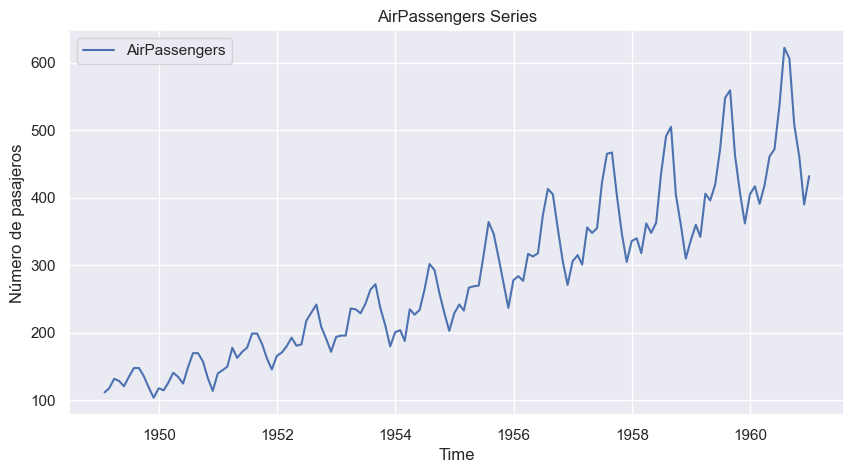

In [64]:

# Visualización de la serie original
plt.figure(figsize=(10, 5))
plt.plot( air_passengers['value'], label='AirPassengers')
plt.title('AirPassengers Series')
plt.xlabel('Time')
plt.ylabel('Número de pasajeros')
plt.legend()
plt.show()


In [65]:
# Imputación de los valores NaN usando la media
serie_filled = serie.fillna(serie.mean())
serie_filled

1949-01-31    112.000000
1949-02-28    118.000000
1949-03-31    132.000000
1949-04-30    129.000000
1949-05-31    281.705036
                 ...    
1960-08-31    606.000000
1960-09-30    508.000000
1960-10-31    461.000000
1960-11-30    390.000000
1960-12-31    432.000000
Freq: ME, Name: value, Length: 144, dtype: float64

In [66]:
# Combinar ambas series en un DataFrame
serie_combined = pd.DataFrame({'Original': air_passengers['value'], 'Imputed': serie_filled})
serie_combined


,Original,Imputed
1949-01-31,112,112.000000
1949-02-28,118,118.000000
1949-03-31,132,132.000000
1949-04-30,129,129.000000
1949-05-31,121,281.705036
...,...,...
1960-08-31,606,606.000000
1960-09-30,508,508.000000
1960-10-31,461,461.000000
1960-11-30,390,390.000000


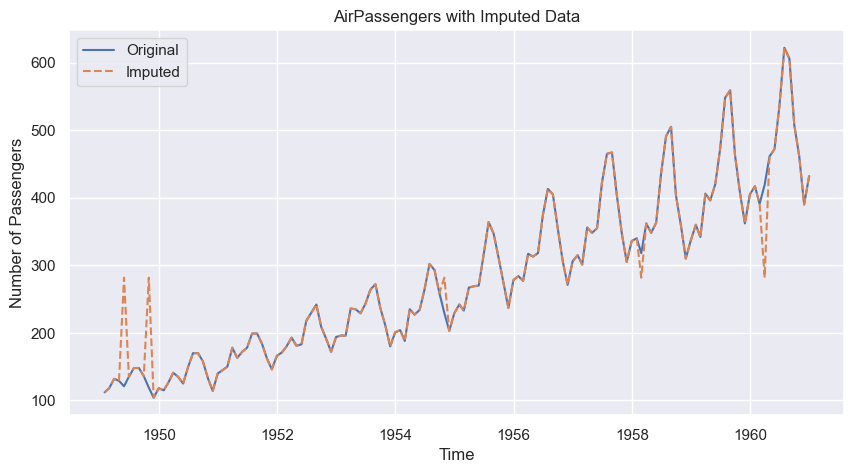

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(serie_combined['Original'], label='Original')
plt.plot(serie_combined['Imputed'], label='Imputed', linestyle='--')
plt.title('AirPassengers with Imputed Data')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


### Imputación de valores perdidos mediante médias móviles:

In [73]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Imputación usando un promedio móvil exponencial con ventana de 3
serie_filled_exp = serie.fillna(serie.ewm(span=3, adjust=False).mean())
serie_filled_exp

1949-01-31    112.00
1949-02-28    118.00
1949-03-31    132.00
1949-04-30    129.00
1949-05-31    126.25
               ...  
1960-08-31    606.00
1960-09-30    508.00
1960-10-31    461.00
1960-11-30    390.00
1960-12-31    432.00
Freq: ME, Name: value, Length: 144, dtype: float64

In [72]:
# Combinar ambas series en un DataFrame
serie_combined_exp = pd.DataFrame({'Original': air_passengers['value'], 'Imputed_Exp': serie_filled_exp})
serie_combined_exp


,Original,Imputed_Exp
1949-01-31,112,112.0
1949-02-28,118,118.0
1949-03-31,132,132.0
1949-04-30,129,129.0
1949-05-31,121,127.2
...,...,...
1960-08-31,606,606.0
1960-09-30,508,508.0
1960-10-31,461,461.0
1960-11-30,390,390.0


In [13]:
# Imputación utilizando el último valor observado (LOCF - Last Observation Carried Forward)
serie_locf = serie.copy()
serie_locf.ffill(inplace=True)  # Método para rellenar hacia adelante en pandas
print(serie_locf)


0      112.0
1      118.0
2      132.0
3      129.0
4      129.0
       ...  
139    606.0
140    508.0
141    461.0
142    390.0
143    432.0
Name: value, Length: 144, dtype: float64


In [14]:
# Imputación utilizando interpolación lineal
serie_interpolated = serie.interpolate(method='linear')
print(serie_interpolated)


0      112.0
1      118.0
2      132.0
3      129.0
4      132.0
       ...  
139    606.0
140    508.0
141    461.0
142    390.0
143    432.0
Name: value, Length: 144, dtype: float64


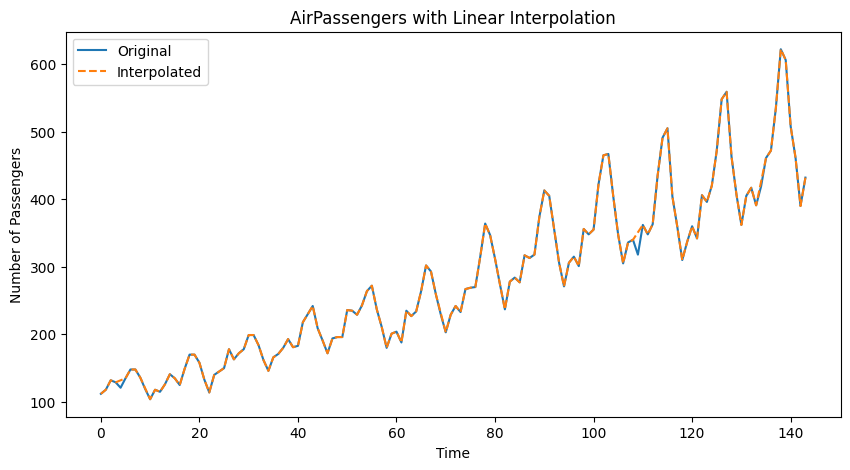

In [15]:
# Combinar ambas series en un DataFrame
serie_combined_interp = pd.DataFrame({'Original': air_passengers['value'], 'Interpolated': serie_interpolated})

# Visualización de la serie interpolada
plt.figure(figsize=(10, 5))
plt.plot(serie_combined_interp['Original'], label='Original')
plt.plot(serie_combined_interp['Interpolated'], label='Interpolated', linestyle='--')
plt.title('AirPassengers with Linear Interpolation')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [17]:
%pip install pykalman

Note: you may need to restart the kernel to use updated packages.


In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Crear un modelo ARIMA para imputación
modelo_arima = ARIMA(serie, order=(1, 1, 0)).fit()
serie_arima = serie.copy()
serie_arima = serie_arima.fillna(modelo_arima.predict(start=0, end=len(serie_arima) - 1))

print(serie_arima)


0      112.00000
1      118.00000
2      132.00000
3      129.00000
4      128.08754
         ...    
139    606.00000
140    508.00000
141    461.00000
142    390.00000
143    432.00000
Name: value, Length: 144, dtype: float64
